# BTC trading technique
The goal was to test the cryptocurrency trading technique of buying and selling when the plots of the long and short averages intersect.

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
from matplotlib import pyplot as plt

In [2]:
#Set the time interval to be tested
start_date = '2022-01-01'
end_date = '2023-02-01'

In [3]:
#Import data from yahoo finance
BTC_EUR = yf.download("BTC-EUR", start=start_date, end=end_date, interval='1d')

[*********************100%***********************]  1 of 1 completed


In [4]:
print("Head of imported data:")
print(BTC_EUR.head())

Head of imported data:
                                   Open          High           Low  \
Date                                                                  
2022-01-01 00:00:00+00:00  40717.378906  42049.867188  40696.929688   
2022-01-02 00:00:00+00:00  41921.167969  42097.429688  41196.710938   
2022-01-03 00:00:00+00:00  41628.324219  41849.964844  40575.277344   
2022-01-04 00:00:00+00:00  41106.375000  41956.500000  40554.570312   
2022-01-05 00:00:00+00:00  40679.453125  41486.542969  37839.750000   

                                  Close     Adj Close       Volume  
Date                                                                
2022-01-01 00:00:00+00:00  41926.339844  41926.339844  21613129995  
2022-01-02 00:00:00+00:00  41629.800781  41629.800781  24577311974  
2022-01-03 00:00:00+00:00  41105.722656  41105.722656  29261479130  
2022-01-04 00:00:00+00:00  40677.875000  40677.875000  37661970660  
2022-01-05 00:00:00+00:00  38520.269531  38520.269531  3258081799

In [5]:
#Setting short and long averages length
short_interval = 7
long_interval = 30

In [6]:
#Calculating short and long average in new columns
BTC_EUR['Short_average'] = BTC_EUR['Close'].rolling(window=short_interval, min_periods=1).mean()
BTC_EUR['Long_average'] = BTC_EUR['Close'].rolling(window=long_interval, min_periods=1).mean()

print("Head of data with averages:")
print(BTC_EUR.head())

Head of data with averages:
                                   Open          High           Low  \
Date                                                                  
2022-01-01 00:00:00+00:00  40717.378906  42049.867188  40696.929688   
2022-01-02 00:00:00+00:00  41921.167969  42097.429688  41196.710938   
2022-01-03 00:00:00+00:00  41628.324219  41849.964844  40575.277344   
2022-01-04 00:00:00+00:00  41106.375000  41956.500000  40554.570312   
2022-01-05 00:00:00+00:00  40679.453125  41486.542969  37839.750000   

                                  Close     Adj Close       Volume  \
Date                                                                 
2022-01-01 00:00:00+00:00  41926.339844  41926.339844  21613129995   
2022-01-02 00:00:00+00:00  41629.800781  41629.800781  24577311974   
2022-01-03 00:00:00+00:00  41105.722656  41105.722656  29261479130   
2022-01-04 00:00:00+00:00  40677.875000  40677.875000  37661970660   
2022-01-05 00:00:00+00:00  38520.269531  38520.269531 

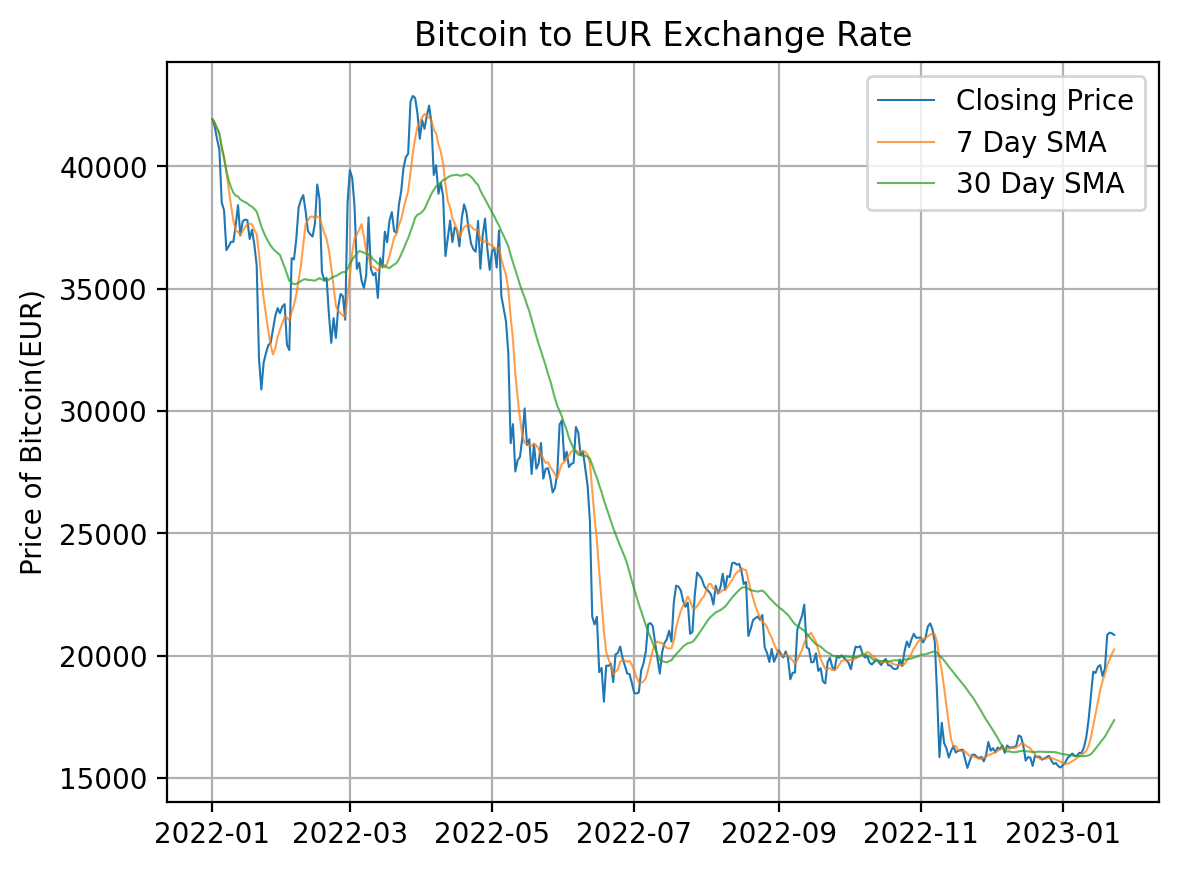

In [7]:
fig, ax = plt.subplots(dpi=200)

ax.plot(BTC_EUR['Close'], lw=0.75, label='Closing Price')

ax.plot(BTC_EUR['Short_average'], lw=0.75, alpha=0.75, label=(str(short_interval) + ' Day SMA'))
ax.plot(BTC_EUR['Long_average'], lw=0.75, alpha=0.75, label=(str(long_interval) + ' Day SMA'))

ax.set_ylabel('Price of Bitcoin(EUR)')
ax.set_title('Bitcoin to EUR Exchange Rate')
ax.grid()
ax.legend()

In [8]:
#Search for traade signals
trade_signals = BTC_EUR

trade_signals['Signal'] = 0.0
trade_signals['Signal'] = np.where(trade_signals['Short_average'] > trade_signals['Long_average'], 1.0, 0.0)

trade_signals['Position'] = trade_signals['Signal'].diff()

print("Head of data with trade signals:")
print(trade_signals.head())

Head of data with trade signals:
                                   Open          High           Low  \
Date                                                                  
2022-01-01 00:00:00+00:00  40717.378906  42049.867188  40696.929688   
2022-01-02 00:00:00+00:00  41921.167969  42097.429688  41196.710938   
2022-01-03 00:00:00+00:00  41628.324219  41849.964844  40575.277344   
2022-01-04 00:00:00+00:00  41106.375000  41956.500000  40554.570312   
2022-01-05 00:00:00+00:00  40679.453125  41486.542969  37839.750000   

                                  Close     Adj Close       Volume  \
Date                                                                 
2022-01-01 00:00:00+00:00  41926.339844  41926.339844  21613129995   
2022-01-02 00:00:00+00:00  41629.800781  41629.800781  24577311974   
2022-01-03 00:00:00+00:00  41105.722656  41105.722656  29261479130   
2022-01-04 00:00:00+00:00  40677.875000  40677.875000  37661970660   
2022-01-05 00:00:00+00:00  38520.269531  38520.26

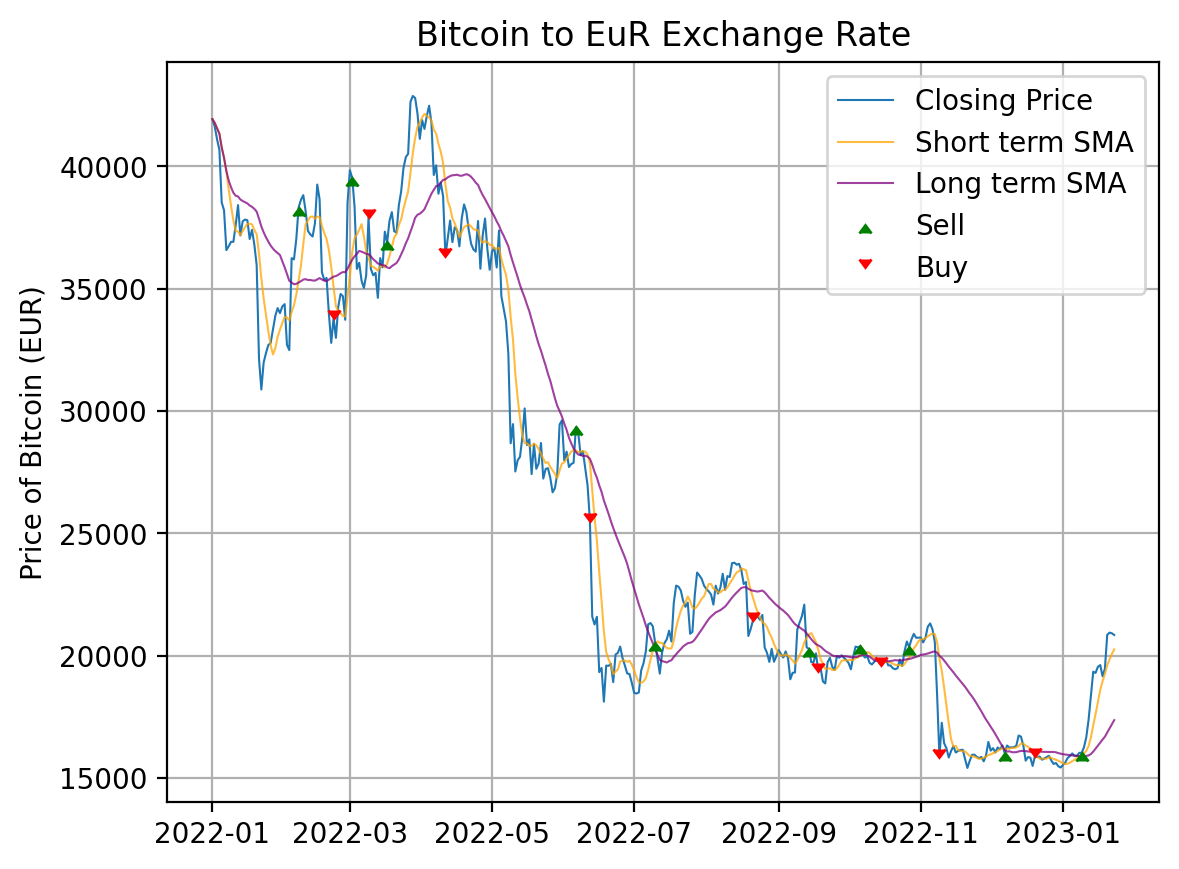

In [9]:
fig2, ax2 =plt.subplots(dpi=200)

ax2.plot(BTC_EUR['Close'], lw=0.75, label='Closing Price')
ax2.plot(BTC_EUR['Short_average'], lw=0.75, alpha=0.75, color='orange', label='Short term SMA')
ax2.plot(BTC_EUR['Long_average'], lw=0.75, alpha=0.75, color='purple', label='Long term SMA')

ax2.plot(trade_signals.loc[trade_signals['Position']==1.0].index, trade_signals['Close'][trade_signals['Position'] == 1.0], marker=6, ms=4, linestyle='none', color='green', label='Sell')
ax2.plot(trade_signals.loc[trade_signals['Position']==-1.0].index, trade_signals['Close'][trade_signals['Position'] == -1.0], marker=7, ms=4, linestyle='none', color='red', label='Buy')

ax2.set_ylabel('Price of Bitcoin (EUR)')
ax2.set_title('Bitcoin to EuR Exchange Rate')

ax2.grid()  
ax2.legend()

plt.show()


# After the analysis performed, it can be concluded that the trading strategy works to a limited extent.